# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [89]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gregbuiter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [90]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [91]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [92]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin AND Bitcoin",
                                  language="en",
                                  page_size=100,
                                  sort_by="relevancy"
                                 )

In [93]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum AND Ethereum",
                                  language="en",
                                  page_size=100,
                                  sort_by="relevancy"
                                 )

In [94]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000
4,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865


In [95]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
#cols = ["Compound", "Negative", "Neutral", "Positive"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
1,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909


In [96]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.111732,0.056420,0.027260,0.916330
std,0.331116,0.066425,0.044453,0.084028
min,-0.680800,0.000000,0.000000,0.662000
25%,0.000000,0.000000,0.000000,0.855500
50%,0.000000,0.048000,0.000000,0.931000
75%,0.323650,0.097000,0.058500,1.000000
max,0.817600,0.269000,0.219000,1.000000


In [97]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.097812,0.048450,0.02342,0.928140
std,0.339858,0.064534,0.04546,0.077721
min,-0.918600,0.000000,0.00000,0.694000
25%,0.000000,0.000000,0.00000,0.886250
50%,0.000000,0.000000,0.00000,0.942500
75%,0.323650,0.077500,0.04050,1.000000
max,0.827100,0.256000,0.28900,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

    A: BTC had the highest mean positive score of 0.057.

Q: Which coin had the highest compound score?

    A: ETH had the highest compound score of 0.8271.

Q. Which coin had the highest positive score?
   
    A: BTC has the highest positive score of 0.269.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [98]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [99]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words("english"))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [56]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub("", text)
   
    # Create a tokenized list of the words
    sentence = sent_tokenize(clean_text)
    words = []
    for sent in sentence:
        word = word_tokenize(sent)
        words = words + word    
   
    # Convert the words to lowercase
    words_lc = [word.lower() for word in words]    
    
    # Remove the stop words
    sw = set(stopwords.words("english"))
    words_sw = [word for word in words_lc if word not in sw]
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words_sw]
    
    return tokens

In [57]:
# Create a new tokens column for Bitcoin
btc_df["Tokens"] = [tokenizer(text) for text in btc_df["text"]]
btc_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942,"[share, square, today, american, fintech, comp..."
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000,"[tesla, relationship, bitcoin, dalliance, acco..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000,"[cryptocurrency, price, continued, tumble, fri..."
4,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865,"[crypto, industry, whole, seen, momentous, yea..."


In [58]:
# Create a new tokens column for Ethereum
eth_df["Tokens"] = [tokenizer(text) for text in eth_df["text"]]
eth_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, detrac..."
1,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966,"[venmo, jumping, aboard, cryptocurrency, bandw..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000,"[new, york, cnn, businessbitcoin, price, conti..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909,"[creator, behind, cryptopunks, one, popular, n..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [59]:
from collections import Counter
from nltk import ngrams

In [60]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(btc_df["text"])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('char', 'reuters'), 18),
 (('virtual', 'currency'), 16),
 (('illustration', 'taken'), 14),
 (('representation', 'virtual'), 13),
 (('currency', 'bitcoin'), 12),
 (('seen', 'front'), 11),
 (('front', 'stock'), 11),
 (('stock', 'graph'), 11),
 (('graph', 'illustration'), 11),
 (('char', 'bitcoin'), 10)]

In [61]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(eth_df["text"])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('representation', 'virtual'), 11),
 (('virtual', 'currency'), 11),
 (('illustration', 'taken'), 11),
 (('char', 'reuters'), 10),
 (('seen', 'front'), 9),
 (('front', 'stock'), 9),
 (('stock', 'graph'), 9),
 (('graph', 'illustration'), 9),
 (('char', 'april'), 9),
 (('april', 'min'), 9)]

In [62]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [63]:
# Use token_count to get the top 10 words for Bitcoin
big_string = ' '.join(btc_df["text"])
processed = tokenizer(big_string)
token_count(processed)

[('char', 100),
 ('bitcoin', 76),
 ('reuters', 34),
 ('cryptocurrency', 27),
 ('currency', 24),
 ('seen', 20),
 ('stock', 19),
 ('inc', 16),
 ('virtual', 16),
 ('taken', 15)]

In [64]:
# Use token_count to get the top 10 words for Ethereum
big_string = ' '.join(eth_df["text"])
processed = tokenizer(big_string)
token_count(processed)

[('char', 100),
 ('bitcoin', 32),
 ('cryptocurrency', 30),
 ('ethereum', 29),
 ('currency', 23),
 ('reuters', 22),
 ('digital', 16),
 ('april', 15),
 ('new', 13),
 ('crypto', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

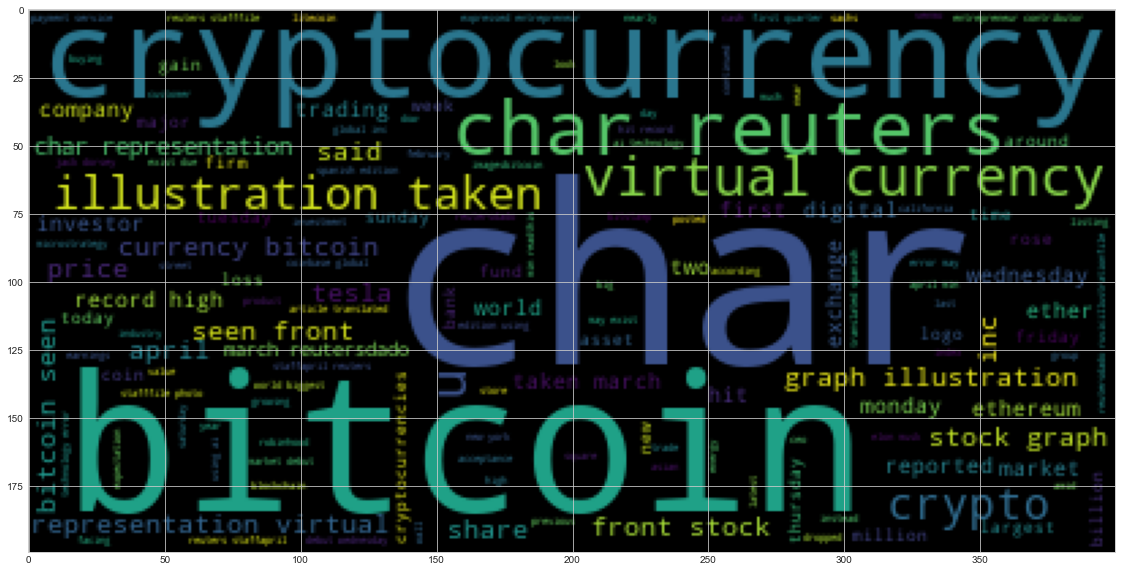

In [69]:
# Generate the Bitcoin word cloud
big_string = " ".join(btc_df["text"])
processed = tokenizer(big_string)
input_text = " ".join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

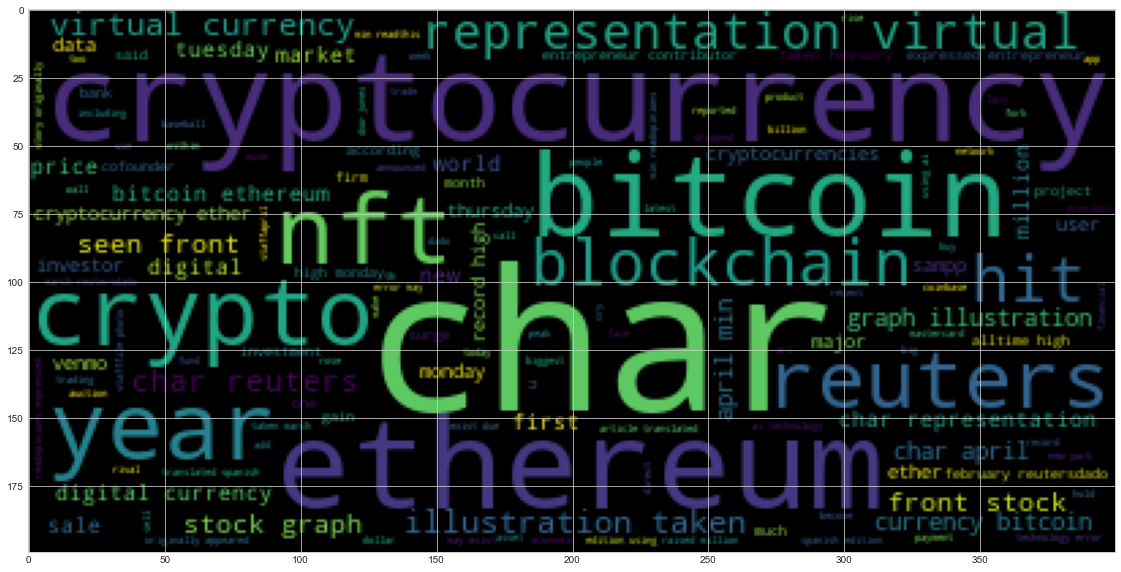

In [70]:
# Generate the Ethereum word cloud
big_string = " ".join(eth_df["text"])
processed = tokenizer(big_string)
input_text = " ".join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [76]:
import spacy
from spacy import displacy

In [77]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [78]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

---
### Bitcoin NER

In [79]:
# Concatenate all of the Bitcoin text together
btc_text = " ".join(btc_df["text"])
#btc_text

In [80]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER - Last 100Days from May 7, 2021"

In [81]:
# Render the visualization
displacy.render(doc, style="ent")

In [82]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coinswitch Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
R

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_text = " ".join(eth_df["text"])

In [32]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER - Last 100Days from "

In [83]:
# Render the visualization
displacy.render(doc, style="ent")

In [84]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coinswitch Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
R

---